## To get the age of the ACC database subjects

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
labels_ACCP = pd.read_csv("/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all.csv")
sub_part = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/ACCpatterns_all_subs.csv", header=None) 
labels_ACCP.columns
labels_ACCP = labels_ACCP[labels_ACCP['long_name'].isin(sub_part[0].to_list())]

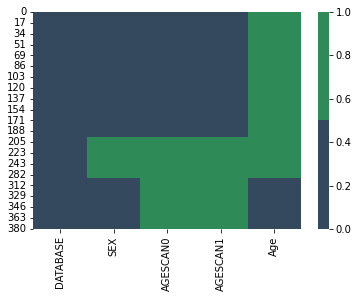

/usr/lib/python3/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,AGESCAN0,AGESCAN1,Age
count,196.000000,196.000000,80.000000
mean,14.036276,20.327143,18.837945
std,3.544815,4.852308,8.046617
min,6.540000,10.380000,9.460274
25%,11.652500,16.747500,11.810274
50%,13.645000,20.215000,17.405479
75%,15.807500,23.985000,25.228082
max,26.420000,32.800000,40.473973


In [22]:
dcfro = labels_ACCP[['DATABASE', 'SEX', 'AGESCAN0', 'AGESCAN1','Age']]
colours = ['#34495E', 'seagreen'] 
sns.heatmap(dcfro.isnull(), cmap=sns.color_palette(colours))
plt.show()
dcfro.AGESCAN0 = dcfro.AGESCAN0.str.replace(',', '.').astype('float')
dcfro.AGESCAN1 = dcfro.AGESCAN1.str.replace(',', '.').astype('float')
dcfro.describe()

In [31]:
print(dcfro.SEX.unique())
print((dcfro.SEX == "M").sum())
print((dcfro.SEX == "F").sum())
print(len(dcfro)-((dcfro.SEX == "M").sum()+(dcfro.SEX == "F").sum()))


['M' 'F' nan]
161
115
65


In [41]:
#46 adolescents (20 males for 59 sub, M = 16.4 ± 0.52 years, range = 15–17 years)
#19 children (27 males for 64, M ± SD = 9.8 ± 0.56 years, range = 9–10 years)
nb_tot_male= 161 + 46*20/59 + 19*27/64
nb_tot_female = 115 + 46*(1-20/59) + 19*(1-27/64)
print(nb_tot_male)
print(nb_tot_female)
print(nb_tot_male / (nb_tot_male + nb_tot_female))

184.60884533898306
156.39115466101694
0.5413749130175456


In [42]:
(18.83*(161+115)+16.4*46 + 9.8*19)/341

17.99906158357771

In [46]:
42433-(1038)

41395